# Diamonds

## Question 1: Data Prep
Load packages to fit classification trees

In [ ]:
# Load required packages
library(ggplot2)
library(dplyr)
library(glmnet)
library(stats)
library(repr)
library(rpart) # For tree functions
library(randomForest) # For Random Forest

Load data. Drop the GEM_ID variable and print first rows.

In [ ]:
# Load data
diamonds <- read.csv('Diamonds_sample.csv', header = TRUE, stringsAsFactors = TRUE)

# Drop GEM_ID
myvars <- c("carat","clarity","high_color","cut","cost")
diamonds <- diamonds[myvars]
diamonds <- na.omit(diamonds)

# Print rows
head(diamonds)
summary(diamonds)

,carat,clarity,high_color,cut,cost
,<dbl>,<int>,<int>,<int>,<dbl>
1,0.2746253,1,1,1,3468.159
2,0.4699232,1,1,1,4814.552
3,0.6673995,1,1,1,6473.046
4,0.4628467,1,1,1,2992.616
5,0.5830976,1,0,1,5471.689
6,0.4277917,1,1,1,3999.953


     carat            clarity         high_color          cut        
 Min.   :0.03988   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.25546   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.36372   Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   :0.37141   Mean   :0.7366   Mean   :0.6188   Mean   :0.7109  
 3rd Qu.:0.48627   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :0.88796   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      cost      
 Min.   :-1473  
 1st Qu.: 2184  
 Median : 3229  
 Mean   : 3266  
 3rd Qu.: 4295  
 Max.   : 8556  

Split the data evenly (50/50) into training and test data.

**Important:** Seed set to 1

In [ ]:
# Set a seed for reproducibility
set.seed(1)

# Create train and test sets (50% for training, 50% for testing)
train_rows <- sample(1:nrow(diamonds), nrow(diamonds)/2)
train <- diamonds[train_rows,]
test <- diamonds[-train_rows,]

## Fully Grown Tree

Simple classification tree using the training data to predict whether the diamond is a high value color or not (``high_color``). Tree initially grown without any pruning or depth parameters: set `` cp=0, minsplit=2, minbucket=1``. Display the confusion matrix and calculate the mean squared error in the testing data. 

In [ ]:
# Simple classification tree training data using all of the variables
full_tree <- rpart(as.factor(high_color)~., train, method="class", control=rpart.control(cp=0, minsplit=2, minbucket=1))

# Fit model to test data
pred <- predict(full_tree, test, type="class")
test$pred <- ifelse(pred==1, 1, 0)

# Calculate MSE, which is just % incorrect predictions
mean((test$pred-test$high_color)^2)

# Display the "confusion" table where we have the predicted values vs. actual values
confusion <- table(test$pred, test$high_color)
confusion

[1] 0.0982906

   
      0   1
  0  73  11
  1  12 138

Plot the unpruned tree

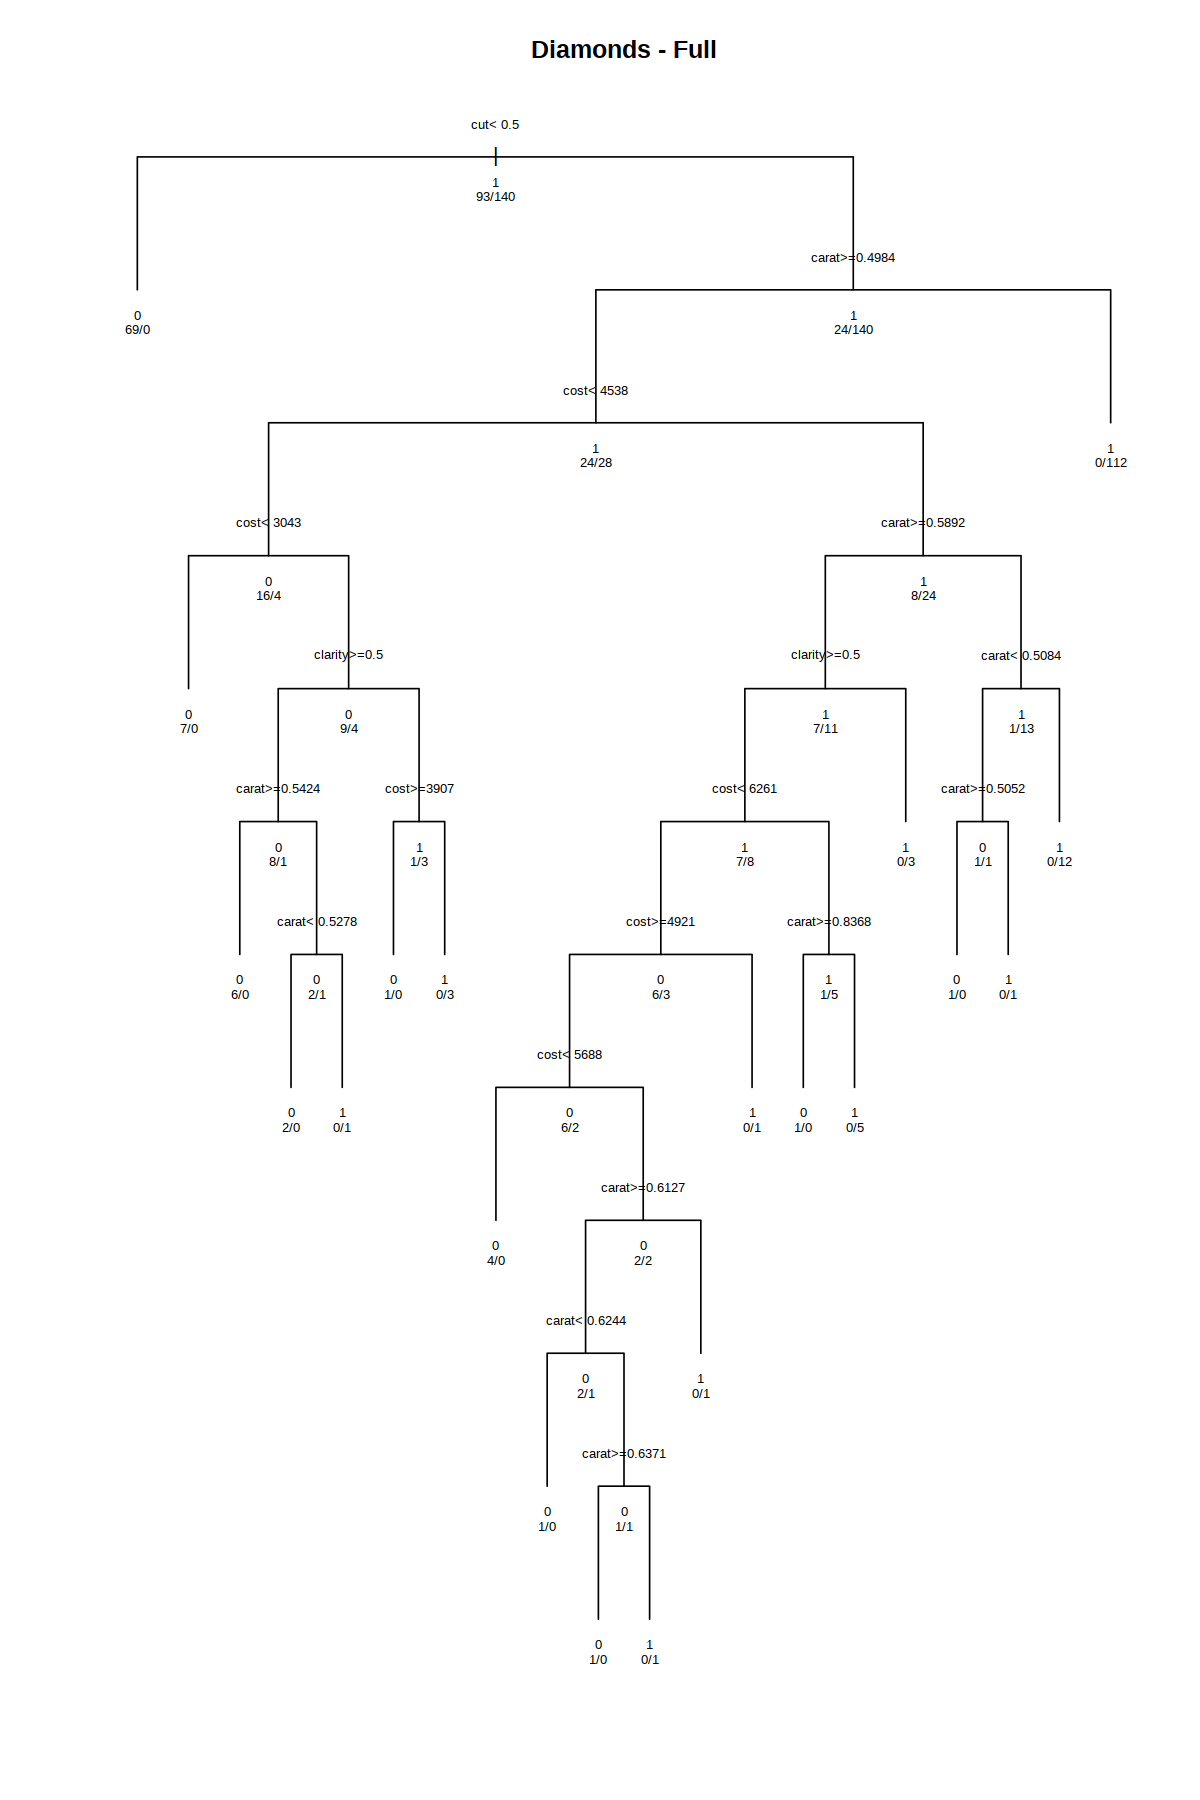

In [ ]:
# Plotting options
options(repr.plot.width=10, repr.plot.height=15) # makes size more adequate

# Plot the tree
plot(full_tree, uniform=TRUE, main="Diamonds - Full") # plot tree
text(full_tree, use.n=TRUE, all=TRUE, cex=0.6) # add labels to tree

## Pruned Tree

Create a new tree with the pruning parameter ``cp=0.05`` (leave the ``minsplit`` and ``minbucket`` parameters the same). Display the confusion matrix and calculate its MSE in the test data. 

In [ ]:
# Simple classification pruned tree on training data using all of the variables
pruned_tree <- rpart(as.factor(high_color)~., train, method="class", control=rpart.control(cp=0.05, minsplit=2, minbucket=1))

# Fit model to test data
pred2 <- predict(pruned_tree, test, type="class")
test$pred2 <- ifelse(pred2==1, 1, 0)

# Calculate MSE
mean((test$pred2-test$high_color)^2)

# Display the "confusion" table where we have the predicted values vs. actual values
confusion2 <- table(test$pred2, test$high_color)
confusion2

[1] 0.08974359

   
      0   1
  0  74  10
  1  11 139

Plot pruned tree.

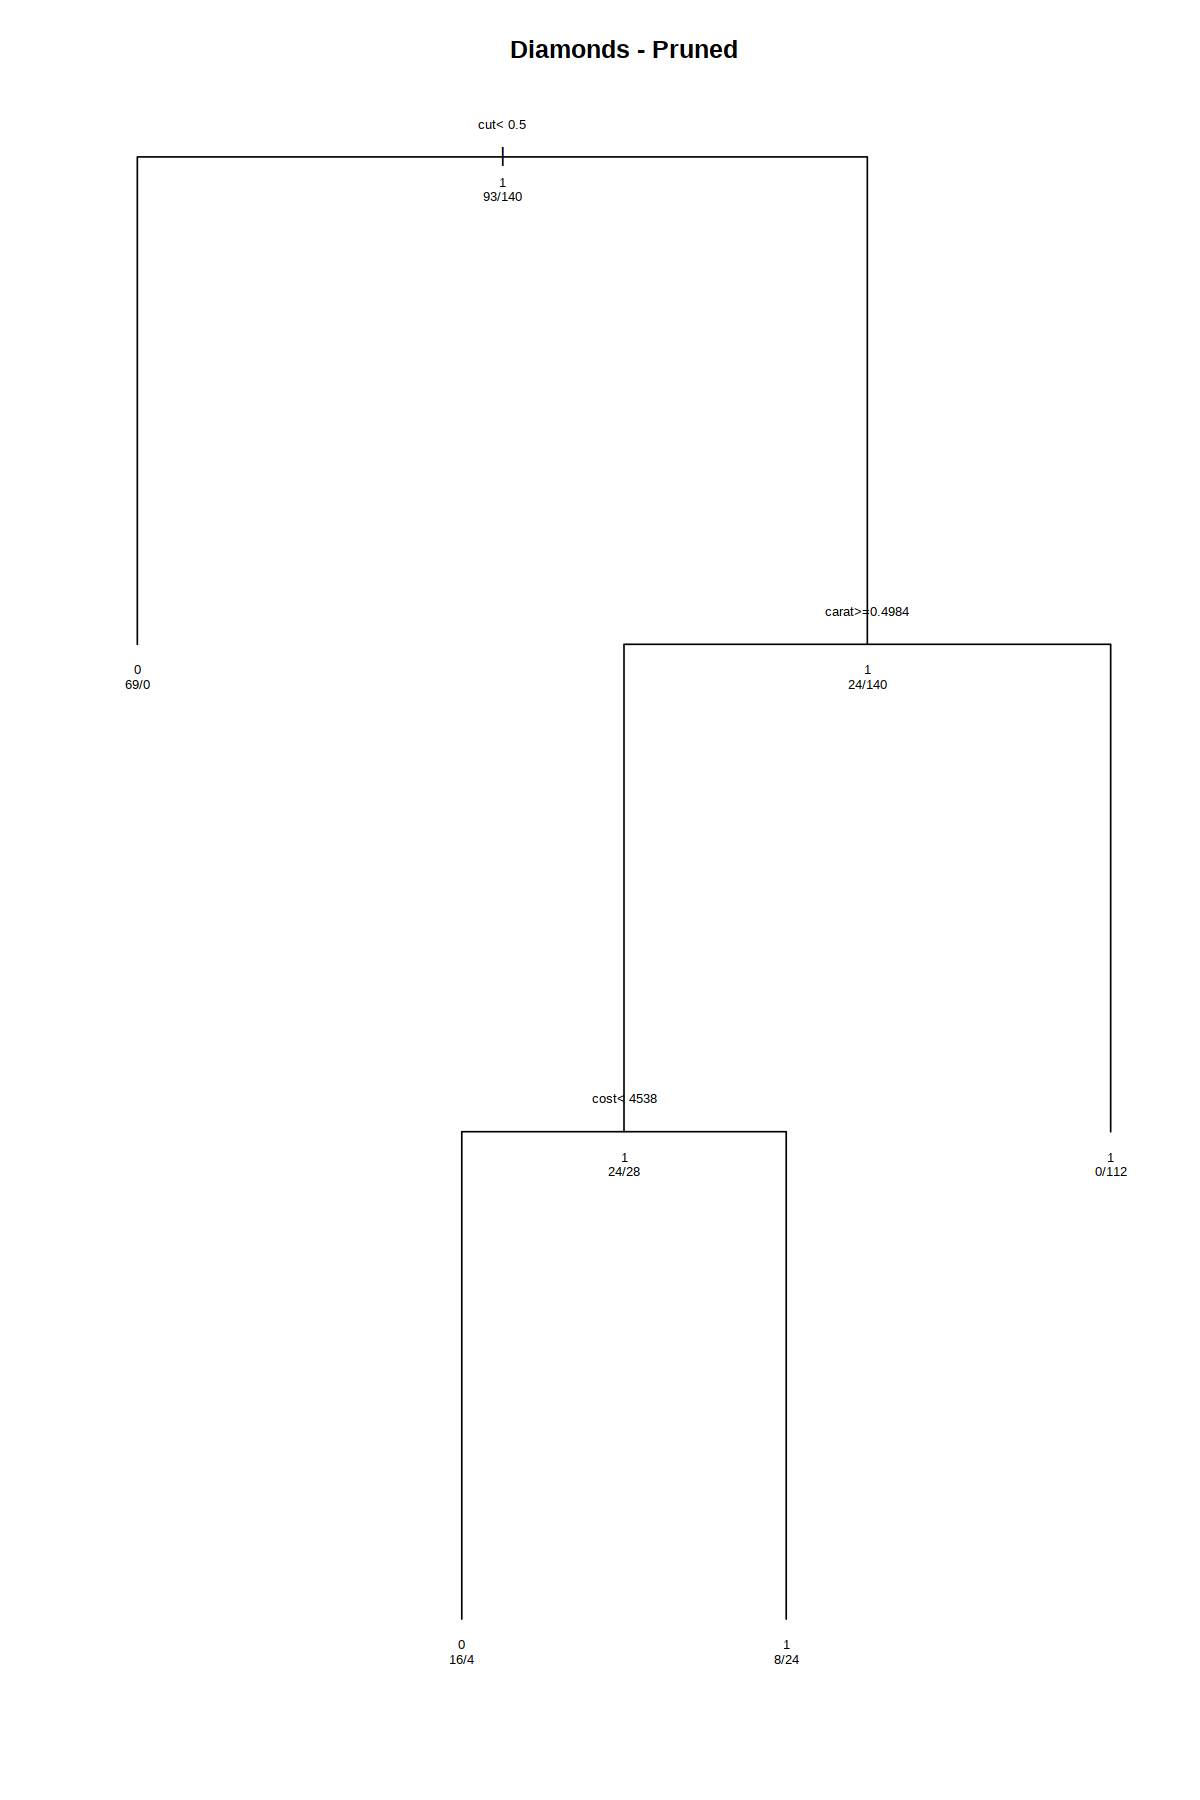

In [ ]:
# Plotting options
options(repr.plot.width=10, repr.plot.height=15) # makes size more adequate

# Plot the tree
plot(pruned_tree, uniform=TRUE, main="Diamonds - Pruned") # plot tree
text(pruned_tree, use.n=TRUE, all=TRUE, cex=0.6) # add labels to tree

## Random Forest
Use a random forest model to predict the diamond color.

Run a random forest model on the training data. Seed set to 1 and number of trees set at 500, minimum terminal node size set to 1, and the number of variables sampled at each split set to 2 (``ntree = 500 , nodesize = 1, mtry = 2``). 

**Important:** Set the seed to 1

In [ ]:
# Set seed  for replicating results as there's a lot of randomization that happens in Random Forests
set.seed(1)

# Fit the training data using a Random Forest model
forest <- randomForest(as.factor(high_color)~., data=train, mtry=2, nodesize=1, ntree=500)

# Predict outcomes on the test data
pred_forest <- predict(forest, newdata=test)

# Calculate MSE
test$pred_forest <- ifelse(pred_forest==1, 1, 0)
mean((test$pred_forest-test$high_color)^2)

[1] 0.08119658

Use model to predict test dataset outcomes. Compare predicted and actual outcomes in a confusion matrix.  Calculate the error rate.

In [ ]:
# Display confusion matrix
confusion_forest <- table(pred_forest, test$high_color)
confusion_forest

# Calculate MSE
test$pred_forest <- ifelse(pred_forest==1, 1, 0)
mean((test$pred_forest-test$high_color)^2)

           
pred_forest   0   1
          0  74   8
          1  11 141

[1] 0.08119658